# Проект: Интернет-магазин компьютерных игр  «Стримчик».

## Описание проекта.
**Описание:** из открытых источников взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) интернет-магазина  «Стримчик», который продаёт по всему миру компьютерные игры. Данные взяты до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:** необходимо выявить определяющие успешность игры закономерности, это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Основные задачи, которые необходимо выполнить:**
1. предобработка данных;
2. исследовательский анализ данных;
3. составить портрет пользователя каждого региона;
4. проверить гипотезы:

**Ход исследования:**
Данные для анализа я получу из файла: 'games.csv'. О качестве данных заранее ничего не известно, поэтому перед тем, как приступить к целям исследования понадобиться обзор данных.

Проверю данные на ошибки и оценю их влияние на исследование. На этапе предобработки поищу возможность исправить найденные ошибки, которые не преведут к искажению конечного результата.

Если потребуется, то создам новые поля в уже предоставленных данных, для решения поставленных задач.

*Таким образом мое исследование пройдет этапы:*
1. загрузка данных;
2. обзор данных;
3. предобработка данных;
4. исследовательский анализ;
5. составление портрета пользователя каждого региона:
    - самые популярные платформы (топ-5),
    - самые популярные жанры (топ-5),
    - влияние рейтинга ESRB на продажи в отдельном регионе;
6. проверка гипотез:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые,
    - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;    
7. написание общего вывода и предложений.

## Описание данных.
Из открытых источников взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные взяты до 2016 года и сохранены в файле 'games.csv'.

**Описание полей:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

## Загрузка данных.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # работа с датами
import plotly.express as px
import seaborn as sns
import matplotlib.ticker as ticker
import datetime as dt

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from ast import literal_eval
from scipy import stats as st #проверка гипотез

In [2]:
pd.set_option('display.max_columns', None)                  # команда для отображения всех столбцов датафрейма
# pd.set_option('display.max_rows', None)                     # команда для отображения всех строк датафрейма
pd.set_option('display.float_format', lambda x: '%.3f' % x) # перевод данных из экспоненциальной нотации в обычную
pd.options.display.max_colwidth = None                      # устанавливаем неограниченную ширину столбцов

In [3]:
# Загрузка данных
try:
    df = pd.read_csv('/datasets/games.csv') 
    display("Файлы успешно загружены!")
    
except Exception as e:
    display(f'Не удалось прочитать файл: {e}') # вывод ошибки, если данные не прочитались

'Файлы успешно загружены!'

## Предобработка данных.
**Необходимо выполнить следующее:**
1. Замена названия столбцов (приведение к нижнему регистру).
2. Преобразование данных к нужному типу; описать, в каких столбцах заменен тип данных и почему.
3. Обработка пропусков при необходимости:
    - объяснение заполнения или не заполнения пропусков;
    - описание причин, которые могли привести к пропускам;
    - отдельно разобрать значение с аббревеатурой 'tbd' в столбце с оценкой пользователей и описать, как его обработать;
4. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Изучение данных.

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN


Данные отображаются корректно. Требуется привести название столбцов к единообразному виду - написанию нижним регистром.

In [5]:
# написание название полей нижним регистром
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 16715 строки и 11 полей. В датафрейме присутствуют пропуски в данных.

Требуется изменить тип данных полей:
- 'year_of_release' с float64 на datetime, т.к. указан год выпуска игры;
- 'user_score' с object на float64.

Перед изменением типов данных необходимо поработать с пропусками.

In [7]:
# статистика по всем столбцам
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,16446.000,NaN,NaN,NaN,2006.485,5.877,1980.000,2003.000,2007.000,2010.000,2016.000
genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,16715.000,NaN,NaN,NaN,0.263,0.814,0.000,0.000,0.080,0.240,41.360
eu_sales,16715.000,NaN,NaN,NaN,0.145,0.503,0.000,0.000,0.020,0.110,28.960
jp_sales,16715.000,NaN,NaN,NaN,0.078,0.309,0.000,0.000,0.000,0.040,10.220
other_sales,16715.000,NaN,NaN,NaN,0.047,0.187,0.000,0.000,0.010,0.030,10.570
critic_score,8137.000,NaN,NaN,NaN,68.968,13.938,13.000,60.000,71.000,79.000,98.000
user_score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Анализ выведенных статистических данных:**
1. ***'name' (название игры)*** - количество непустых строк 16713, количество уникальных значений 11559, самое популярное название игры "Need for Speed: Most Wanted", оно встречается 12 раз.
2. ***'platform' (платформа)*** - данные полные, платформ 31, самая популярная "PS2", она встречается 2161 раз.
3. ***'year_of_release' (год выпуска игры)*** - количество непустых строк 16446; самый поздний год выпуска игры 1980, самый ранний - 2016; 25% игр годом выпуска до 2003, 50% - годом выпуска до 2007 и только четверть (25%) анализируемых игр выпущено позже 2010 года.
4. ***'genre' (жанр игры)*** - количество непустых строк 16713; представлено 12 жанров, самый популярный - "Action", встречается 3369 раз.
5. ***'na_sales' (продажи в Северной Америке)*** - данные полные; минимальные продажи -0, максимальные продажи 41,36 млн копий; стандартное отклонение (0,814) указывает на большую вариативность продаж; среднее (0.263) и медианное (0,080) значения сильно разнятся, что тоже свидетельствует о большой вариативности; 25% игр вообще не продалось, 75% продалось менее 24 тыс. копий.
6. ***'eu_sales' (продажи в Европе)*** - данные полные; минимальные продажи -0, максимальные продажи 28,96 млн копий; стандартное отклонение (0,503) указывает на большую вариативность продаж; среднее (0.145) и медианное (0,020) значения сильно разнятся, что тоже свидетельствует о большой вариативности; 25% игр вообще не продалось, 75% продалось менее 11 тыс. копий.
7. ***'jp_sales' (продажи в Японии)*** - данные полные; минимальные продажи -0, максимальные продажи 10,22 млн копий; стандартное отклонение (0,309) указывает на большую вариативность продаж; среднее (0.078) и медианное (0) значения сильно разнятся, что тоже свидетельствует о большой вариативности; 50% (медиана) игр вообще не продалось, 75% продалось менее 4 тыс. копий.
8. ***'other_sales' (продажи в других странах)*** - данные полные; минимальные продажи -0, максимальные продажи 10,57 млн копий; стандартное отклонение (0,187) указывает на большую вариативность продаж; среднее (0.047) и медианное (0,010) значения сильно разнятся, что тоже свидетельствует о большой вариативности; 25% игр вообще не продалось, 75% продалось менее 3 тыс. копий.
9. ***'critic_score' (оценка критиков (максимум 100))*** - оценки критиков имеются только для 8137 игр, многие игры остались без рецензий; минимальная оценка -13, максимальная 98; стандартное отклонение (13,938) указывает на большую вариативность оценок; среднее (69) и медианное (71) значения сильно разнятся, что тоже свидетельствует о большой вариативности; 25% игр имеют оценку менее 60, 75% - менее 79.
10. ***'user_score' (оценка пользователей (максимум 10))*** - оценки пользователей имеются только для 10014 игр; самое частовстречающееся значение 'tbd' ("To Be Determined") - оценка еще не выставлена или не определена.
11. ***'rating' (рейтинг (возростная категория) от организации ESRB)*** - рейтинг указан для 9949 игр; рейтингов 8, самый популярный рейтинг Е, встречается 3990 раз.

**Основные выводы:**
1. Много информации в анализируемых данных отсутствует.
2. Анализируемые игры с годами выпуска от 1980 до 2016.
3. Большинство игр продается плохо; высокий разброс продаж — есть как хиты с десятками миллионов копий, так и провальные игры; 25% игр вообще не имеют продаж; рынок конкурентный, но лишь немногие игры становятся суперуспешными.
4. Большинство игр получает положительные оценки (60–79 баллов), но не дотягивает до 100 баллов; половина игр оценивается выше 71, что говорит о склонности критиков к мягкой оценке; не все игры получили оценки (оценки есть только у 8137 из 16715 игр).
5. В оценках пользователей большинство игр имеют значение 'tbd' ("To Be Determined") - оценка еще не выставлена или не определена, это значение для дальнейшего анализа заменю на Nan.

In [8]:
# замена 'tbd' на nan в поле 'user_score'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

### Обработка пропусков.

In [9]:
# информация о количестве пропусков (в %) 
display((df.isna().mean() * 100).sort_values(ascending=False))

user_score        54.592
critic_score      51.319
rating            40.479
year_of_release    1.609
name               0.012
genre              0.012
platform           0.000
na_sales           0.000
eu_sales           0.000
jp_sales           0.000
other_sales        0.000
dtype: float64

In [10]:
# Комментарий ревьюера
import pandas as pd        # Импортируем билиотеку (вдруг она не установлена в окружении)
temp = df.copy()           # Делаем копию текущего датасета
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
name,2,0.000100
platform,0,0.000000
year_of_release,269,0.016100
genre,2,0.000100
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,0.513200
user_score,9125,0.545900


In [11]:
# удаление строк с пропусками в полях year_of_release, name, genre 
df = df.dropna(subset=['year_of_release', 'name', 'genre'])


Рассмотрю данные столбца 'rating' и 'genre', проверю свое предположение о выставлении рейтинга в соответствии с жанром.

In [12]:
# функция для вывода уникальных значений и их количества в полях 'genre', 'rating'
def unique_values_info(df, columns=['genre', 'rating']):
    for column in columns:
        print(f"Уникальные значения в '{column}':")
        display(df[column].value_counts(dropna=False))
        print("\n" + "="*50 + "\n") # визуальное разделение

# Вызов функции
unique_values_info(df)


Уникальные значения в 'genre':


Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64



Уникальные значения в 'rating':


NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Таким образом в данных представлены игры в жанрах: Action, Sports, Misc, Role-Playing, Shooter, Adventure, Racing, Platform, Simulation, Fighting, Strategy Puzzle.

ESRB (Entertainment Software Rating Board) – это организация, которая оценивает видеоигры и присваивает им возрастные рейтинги. Она действует в Северной Америке, включая США и Канаду.

*Расшифровка рейтингов ассоциацией ESRB по данным интернет ресурсов:*
- ЕС - (3+) игры для самых маленьких, без контента, который мог бы испугать или навредить;
- Е - (6+) подходит для всех, может содержать минимальное количество мультяшного насилия или мягкой лексики;
- Е10+ - (10+) немного больше мультяшного насилия, минимальный уровень грубых выражений;
- Т - (13+) более выраженное насилие, редкая ненормативная лексика, намеки на сексуальный контент;
- М - (17+) кровавое насилие, грубая лексика, сексуальный контент, наркотики;
- АО - (18+) игры с откровенными сценами, жестоким насилием или реальными азартными играми,  присваивался крайне редко, и большинство таких игр либо редактировались, либо не выходили на массовый рынок;
- К-А - игры, которые предназначены для детей и взрослых, указывает, что контент игры был подходящим для широкой аудитории, включая детей, но без какого-либо жестокого насилия, грубых выражений или других неприятных элементов (использовался ассоциацией ESRB до 1997 года);
- RP - временный статус – игра еще не получила рейтинг.

Так же по данным интернет ресурсов рейтинги Ассоциация ESRB (Entertainment Software Rating Board) присваивает на основе анализа их контента. Присвоить возрастной рейтинг только на основе жанра нельзя, но можно сделать приблизительное предположение. Жанр влияет на рейтинг, но не является единственным фактором – важнее контент игры (насилие, язык, темы). Почему жанра недостаточно?: в одной категории могут быть игры с разными рейтингами; игры одного жанра могут сильно отличаться по содержанию; онлайн-функции могут повлиять на рейтинг. Следовательно, Nan в поле 'rating' можно заменить на заглушку, например, 'unknown'.

In [13]:
# Заполняю NaN в столбце 'rating' на основе наиболее часто встречающегося рейтинга для каждого жанра
#df['rating'] = df.groupby('genre')['rating'].transform(lambda x: x.fillna(x.mode()[0]))


#Заполняю NaN в столбце 'rating' на unknown
df['rating'] = df['rating'].fillna('unknown')

In [14]:
# проверка результата замены пропусков
display((df.isna().mean() * 100).sort_values(ascending=False))

user_score        54.616
critic_score      51.453
name               0.000
platform           0.000
year_of_release    0.000
genre              0.000
na_sales           0.000
eu_sales           0.000
jp_sales           0.000
other_sales        0.000
rating             0.000
dtype: float64

In [15]:
print('Размерность датафрейма после обработки пропусков:', df.shape)

Размерность датафрейма после обработки пропусков: (16444, 11)


Замена пропусков в данных прошла успешно. Nan оставила в полях user_score (54,6%) и critic_score (51,4%).

После обработки пропусков в датафрейме осталось 16444 строки из 16715 исходных , количество удаленных строк составило 271 (1,6%).

### Обработка типов данных.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Как и писала ранее, требуется изменить тип данных полей:
- 'year_of_release' с float64 на datetime, т.к. указан год выпуска игры;
- 'user_score' с object на float64, т.к. оценка пользователей - это числовое значение.

In [17]:
# изменение типа поля 'year_of_release' на datetime
df['year_of_release'] = pd.to_datetime(df['year_of_release'].astype('int'), format='%Y')

In [18]:
# изменение типа поля 'user_score' на 'float64'
# изменение через astype(), т.к. в данных присутствуют Nan
df['user_score'] = df['user_score'].astype('float64')

In [19]:
# проверка изменения типа данных 
print(df[['year_of_release', 'user_score']].dtypes)

year_of_release    datetime64[ns]
user_score                float64
dtype: object


Замена типов данных прошла успешно.

### Обработка дубликатов.

Проверю наличие явных дубликатов.

In [20]:
# явные дубликаты всего датафрейма
print('Количество полных дубликатов:', df.duplicated(keep=False).sum())
print('Процент количества дубликатов:', df.duplicated(keep=False).sum()/ len(df)* 100)

Количество полных дубликатов: 0
Процент количества дубликатов: 0.0


Явные дубликаты в данных отсутсутствуют.

Далее посмотрю наличие **неявных дубликатов**, проверю игры по имени, платформе и году релиза одновременно. Перед этим приведу написание названия игр к едному нижнему регистру и удалю лишние пробелы.

In [21]:
# Приводим название игры к единому регистру и убираем лишние пробелы
df['name'] = df['name'].str.strip().str.lower()

# Выводим найденные дубликаты
display(df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
        .sort_values(by=['name', 'platform', 'year_of_release']))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012-01-01,Sports,2.110,0.220,0.000,0.230,83.000,5.500,E
16230,madden nfl 13,PS3,2012-01-01,Sports,0.000,0.010,0.000,0.000,83.000,5.500,E


В данных присутствует задублированная игра madden nfl 13, удалю одну из них, в которой указаны продажи тольео для региона eu_sales, т.к. значения незначительные, то удаление этой строки не исказит дальнейший анализ.

In [22]:
# удаление дубликата
df = df[~df.duplicated(subset=['name', 'platform', 'year_of_release'], keep='first')]

# проверка
display(df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
        .sort_values(by=['name', 'platform', 'year_of_release']))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
df.query('name == "madden nfl 13" and platform =="PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012-01-01,Sports,2.110,0.220,0.000,0.230,83.000,5.500,E


Неявные дубликаты отсутствуют. Удаление строки-дубликата прошло успешно.

### Суммарные продажи.

В анализируемый датафрейм добавлю столбец 'total_sales' с сумарными продажами по всем регионам (миллионы проданых копий).

In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006-01-01,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,super mario bros.,NES,1985-01-01,Platform,29.080,3.580,6.810,0.770,NaN,NaN,unknown,40.240
2,mario kart wii,Wii,2008-01-01,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,wii sports resort,Wii,2009-01-01,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,pokemon red/pokemon blue,GB,1996-01-01,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,unknown,31.380


Поле с суммарными продажами добавлено корректно.

### Общий вывод по предобработке.

**В ходе предобработке было выполнено следующее:**
- анализ статистических данных,
- обработка пропусков,
- изменение типов данных,
- обработка дубликатов,
- добавлено поле с суммарными продажами по всем регионам.

**Выводы:**
1. ***Анализ статистических данных***
    - много информации в анализируемых данных отсутствует.
    - анализируемые игры с годами выпуска от 1980 до 2016.
    - большинство игр продается плохо; высокий разброс продаж — есть как хиты с десятками миллионов копий, так и провальные игры; 25% игр вообще не имеют продаж; рынок конкурентный, но лишь немногие игры становятся суперуспешными.
    - большинство игр получает положительные оценки (60–79 баллов), но не дотягивает до 100 баллов; половина игр оценивается выше 71, что говорит о склонности критиков к мягкой оценке; не все игры получили оценки (оценки есть только у 8137 из 16715 игр).
    - в оценках пользователей большинство игр имеют значение 'tbd' ("To Be Determined") - оценка еще не выставлена или не определена, это значение для дальнейшего анализа заменила на Nan.
    
2. ***Обработка пропусков***
     - в данных отсутствует информация в Оценка пользователей (54,5%) Оценка критиков (51,3%), Рейтинг (возростная категория) от организации ESRB (40,4%), Год выпуска игр (1,6%), Название и Жанр игры менее 1%.
    - *предполагаемые причины*, которые повлияли на появление пропусков в данных - технический сбой при выгрузке данных, нехватка отзывов, отсутствие рецензий, недоступность источников, проблемы с классификацией, отсутствие официальной даты, не указана информация.
    - строки без года выпуска, названия игры и жанра удалила, доля удаленной информации составила 1,6%.
    - Nan в поле 'rating' заменила на наиболее часто встречающийся рейтинг для каждого жанра ('genre').
    - пропуски с Оценнками оставила как есть, т.к. это уникальная информация и ей нет логичной замены.
    
3. ***Замена типов данных -***
типы данных изменила в полях:
    - 'year_of_release' с float64 на datetime, т.к. указан год выпуска игры;
    - 'user_score' с object на float64, т.к. оценка пользователей - это числовое значение.

4. ***Дубликаты*** в анализируемых данных:
    - явные дубликаты отсутствуют,
    - удалена одна строка с игрой madden nfl 13, которая была дубликатом одновременно по названию, платформе и году релиза.
5. ***Добавила поле*** 'total_sales' с суммарными продажами по всем регионам.

In [25]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16443 non-null  object        
 1   platform         16443 non-null  object        
 2   year_of_release  16443 non-null  datetime64[ns]
 3   genre            16443 non-null  object        
 4   na_sales         16443 non-null  float64       
 5   eu_sales         16443 non-null  float64       
 6   jp_sales         16443 non-null  float64       
 7   other_sales      16443 non-null  float64       
 8   critic_score     7982 non-null   float64       
 9   user_score       7462 non-null   float64       
 10  rating           16443 non-null  object        
 11  total_sales      16443 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ["'98 koshien" '.hack//g.u. vol.1//rebirth

## Исследовательский анализ данных.
**Требуется выполнить следующую работу:**
1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывать в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
6. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
7. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
8. Соотнести выводы с продажами игр на других платформах.
9. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Выпуск игр по годам.

In [26]:
df_years = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
df_years.columns = ['count']
display(df_years.sort_values(by='count', ascending=False))

,count
year_of_release,
2008-01-01,1427
2009-01-01,1426
2010-01-01,1255
2007-01-01,1197
2011-01-01,1136
2006-01-01,1006
2005-01-01,939
2002-01-01,829
2003-01-01,775


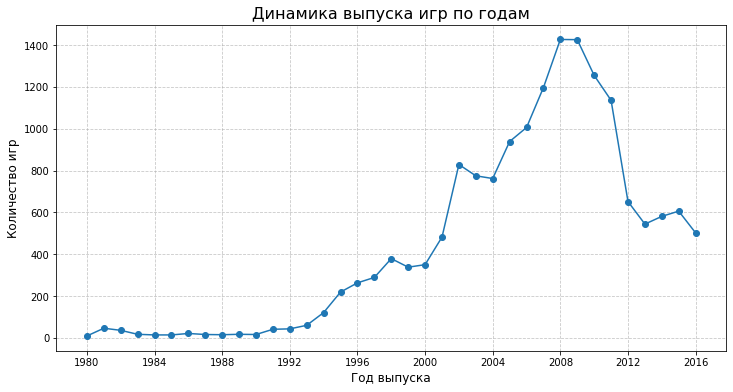

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_years.index, df_years['count'], marker='o', linestyle='-')

plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.title('Динамика выпуска игр по годам', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Из выведенных данных видно, что с 1980 и вплоть до 1993 года выпускалось очень малое количество игр. Рост выпуска игр начался с 1994, а пик (максимальное количество выпускаемых игр) пришелся на 2008-2009 годы, после 2009 начался спад выпуска игр.

Вероятнее всего данные до 1994 года можно исключить из анализа, т.к. до этого года выпускалось очень малое количиство игр и данные будут неинформатифны.

### Продажи по платформам.

In [28]:
df_platform_sales = pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum')
df_platform_sales.columns = ['sum']

# Сортируем данные по убыванию продаж
df_platform_sales= df_platform_sales.sort_values(by='sum', ascending=False)

df_platform_sales

,sum
platform,
PS2,1233.560
X360,961.240
PS3,931.330
Wii,891.180
DS,802.780
PS,727.580
PS4,314.140
GBA,312.880
PSP,289.530


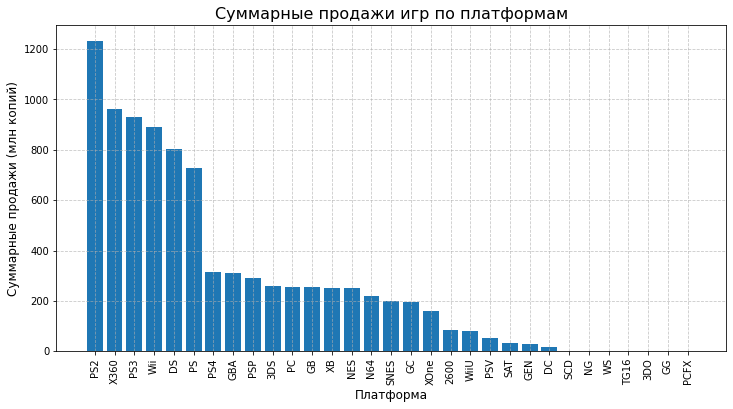

In [29]:
# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(df_platform_sales.index, df_platform_sales['sum'])

# Настраиваем подписи и заголовки
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=12)
plt.title('Суммарные продажи игр по платформам', fontsize=16)
plt.xticks(rotation=90) 
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Как можно понять из выведенных данных, есть ТОП-6 платформ с суммарными продажами, остальные платформы значительно отстают от ТОП-овых по продажам игр.

Проведу анализ продаж по годам для ТОП-6 платформ.

In [30]:
# список названий ТОП-6 платформ
top_platform = list(df_platform_sales.index[:6])

print('ТОП-6 платформ по суммарным продажам:', top_platform)

ТОП-6 платформ по суммарным продажам: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


**Расшифровка названий ТОПовых платформ:**
- PS2 — Sony PlayStation 2;
- X360 — Microsoft Xbox 360;
- PS3 — Sony PlayStation 3;
- Wii — Nintendo Wii;
- DS — Nintendo DS;
- PS - Sony PlayStation/

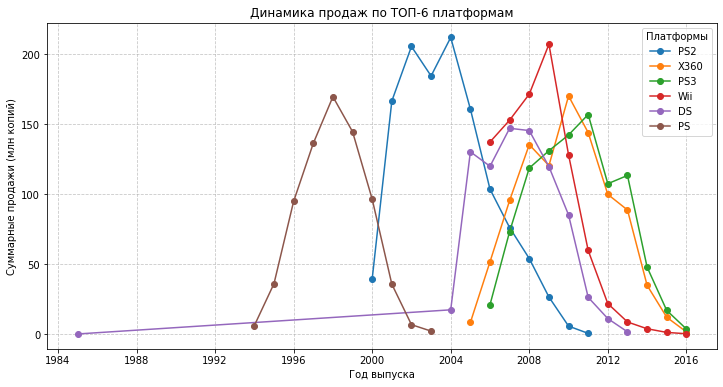

In [31]:
plt.figure(figsize=(12, 6))  # Создаем один график

for platform in top_platform:
    platform_sales = pd.pivot_table(df.query('platform == @platform'), 
                                    index='year_of_release',
                                    values='total_sales', 
                                    aggfunc='sum')

    plt.plot(platform_sales.index, platform_sales['total_sales'], 
             marker='o', linestyle='-', label=platform)  # Добавляем легенду

# Настройка подписей
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.title('Динамика продаж по ТОП-6 платформам')

# Включаем сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем легенду
plt.legend(title='Платформы')

plt.show()


In [32]:
# Расчет срока жизни платформ
temp = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
temp.columns = temp.columns.str.lower()
temp.year_of_release = temp.year_of_release.astype('Int64')
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
print('Средний срок жизни платформы:', time_life['life'].median())

Средний срок жизни платформы: 7.0


**Из выведенных графиков продаж игр по ТОП-6 платформам можно сделать выводы:**
- по всем платформам наблюдается резкий старт продаж,
- средний срок жизни платформы 7 лет,
- с пиком продаж игр на 4-6 год жизни платформы, 
- далее в течении 4-6 лет идет спад продаж и снятие платформы с продажи,
- графики имеют близкий к нормальному распределению вид, за исключением платформ Wii, у которой продажи начались ни с минимального количества, а сразу с больших значений 140 млн копий; и DS, у которой год выпуска первых игр 1984, хотя сама платформа выпущена в 2004 году, вероятнее всего в данных закралась ошибка, изучу подробнее эту игру.

In [33]:
# Комментарий ревьюера
temp = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
temp.columns = temp.columns.str.lower()
temp.year_of_release = temp.year_of_release.astype('Int64')
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [34]:
Nintendo_DS = df.loc[(df['platform'] == 'DS') & (df['year_of_release'].dt.year < 2004)]
Nintendo_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,DS,1985-01-01,Action,0.000,0.000,0.020,0.000,NaN,NaN,unknown,0.020


Действительно, в данных есть ошибка: дата выхода игры Strongest Tokyo University Shogi DS указана 1985 год, когда сама платформа выпущена в продажу в 2004 году (по данным интернет ресурсов). 
Вероятнее всего ошибка могла возникнуть из-за того, что многие игры, изначально вышедшие на старых консолях или ПК, переносятся на новые платформы:
- например, игра могла изначально выйти в 1985 году на PC или Famicom, а затем в 2004+ на DS,
- или база данных хранит год оригинального релиза, а не год выхода версии для DS, то это объясняет несоответствие.

Т.к. данная строка хранит несоответствия, то удалю ее.

In [35]:
df = df.drop(df.loc[(df['platform'] == 'DS') & (df['year_of_release'].dt.year < 2004)].index)

Поскольку платформы живут в среднем около 7 лет с пиком на 4-6 годах, то актуальные тренды лучше всего отражают последние 3-4 года, в данном случае это 2013-2016 годы, этот период позволит учесть последние активные платформы, а также спад продаж, что важно для прогноза на 2017 год.
Для дальнейшего анализа отфильтрую данные в новый датафрейм df_actual с актуальным периодом выпуска игр с 2013 по 2016 года.

In [36]:
# сортировка данных с 2013 по 2016
df_actual = df.loc[(df['year_of_release'].dt.year >= 2013)]

df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             2233 non-null   object        
 1   platform         2233 non-null   object        
 2   year_of_release  2233 non-null   datetime64[ns]
 3   genre            2233 non-null   object        
 4   na_sales         2233 non-null   float64       
 5   eu_sales         2233 non-null   float64       
 6   jp_sales         2233 non-null   float64       
 7   other_sales      2233 non-null   float64       
 8   critic_score     991 non-null    float64       
 9   user_score       1192 non-null   float64       
 10  rating           2233 non-null   object        
 11  total_sales      2233 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 226.8+ KB


### Анализ на актуальных данных с 2013 по 2016 года.

#### Лидирующие платформы по продажам игр.

In [37]:
df_actual_platform_sales = pd.pivot_table(df_actual,
                                               index='platform',
                                               values='total_sales',
                                               aggfunc='sum')

df_actual_platform_sales = df_actual_platform_sales.sort_values(by='total_sales',
                                                                          ascending=False)      
    
display(df_actual_platform_sales)

,total_sales
platform,
PS4,314.140
PS3,181.430
XOne,159.320
3DS,143.250
X360,136.800
WiiU,64.630
PC,39.430
PSV,32.990
Wii,13.660


In [38]:
# список названий ТОП-5 платформ
print('ТОП-5 платформ по суммарным продажам:', list(df_actual_platform_sales.index[:5]))

ТОП-5 платформ по суммарным продажам: ['PS4', 'PS3', 'XOne', '3DS', 'X360']


In [39]:
df_actual_platform_year_sales = pd.pivot_table(df_actual,
                                          index='platform',
                                          columns='year_of_release',
                                          values='total_sales',
                                          aggfunc='sum')


# Выводим результат
display(df_actual_platform_year_sales)


year_of_release,2013-01-01,2014-01-01,2015-01-01,2016-01-01
platform,,,,
3DS,56.570,43.760,27.780,15.140
DS,1.540,NaN,NaN,NaN
PC,12.380,13.280,8.520,5.250
PS3,113.250,47.760,16.820,3.600
PS4,25.990,100.000,118.900,69.250
PSP,3.140,0.240,0.120,NaN
PSV,10.590,11.900,6.250,4.250
Wii,8.590,3.750,1.140,0.180
WiiU,21.650,22.030,16.350,4.600


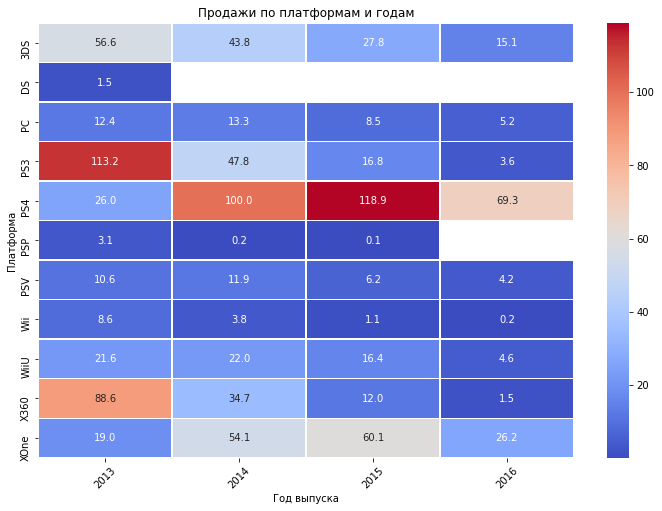

In [40]:
# Преобразуем колонки (годы) к int, чтобы отображался только год
df_actual_platform_year_sales.columns = df_actual_platform_year_sales.columns.year

plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_actual_platform_year_sales, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

# Настроим подписи на оси X (оставляем только годы)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Угол поворота подписей

plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.title('Продажи по платформам и годам')

plt.show()


Проанализировав данные суммарных продаж по платформам, можно сделать следующие **ВЫВОДЫ:**
- ТОП-5 платформ по суммарным продажам: ['PS4', 'PS3', 'XOne', '3DS', 'X360']';
- после 2013 года продажи большинства платформ падают, за исключением PS4, XOne т.к. эти платформы нового поколеня, пришедшие на смену старым. Для этих платформ 2014 и 2015 годы - пик продаж.

#### График "Ящик с усами"  по глобальным продажам игр в разбивке по платформам. 

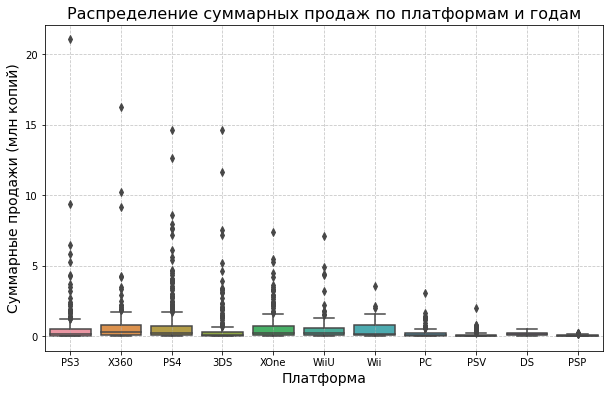

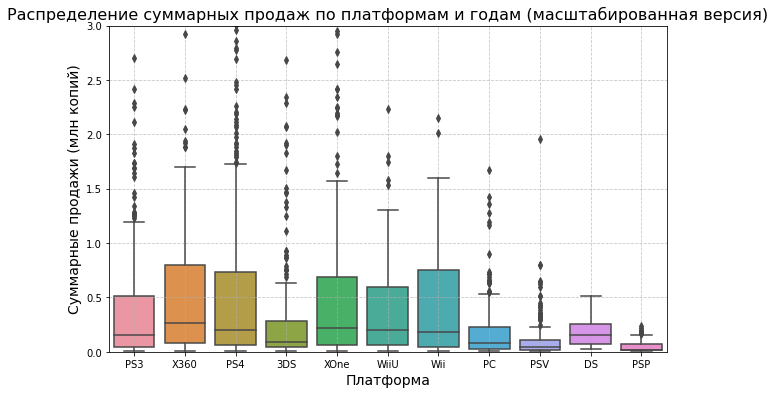

In [42]:
# Настройка графика для всех данных
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха по исходным данным (не агрегированным)
sns.boxplot(x='platform', y='total_sales', data=df_actual)

# Настройка сетки для улучшения восприятия
plt.grid(True, linestyle='--', alpha=0.7)

# Подписи и заголовок
plt.title('Распределение суммарных продаж по платформам и годам', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=14)

# Показать график
plt.show()

# Настройка графика для масштабированной диаграммы размаха
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха по исходным данным (не агрегированным)
sns.boxplot(x='platform', y='total_sales', data=df_actual)

# Масштабируем ось Y для лучшей видимости боксплотов и квантилей
plt.ylim(0, 3)  # Примерный лимит, можно настроить по вашим данным

# Настройка сетки для улучшения восприятия
plt.grid(True, linestyle='--', alpha=0.7)

# Подписи и заголовок
plt.title('Распределение суммарных продаж по платформам и годам (масштабированная версия)', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=14)

# Показать график
plt.show()


**Анализ графиков:**
1. ***Медианные продажи варьируются между платформами:***
    - у разных платформ медианные продажи игр заметно отличаются;
    - наиболее высокие медианные продажи, судя по графику, у платформ X360, PS4, WiiU и XOne;
    - у платформ PC, PSV, PSP медианные продажи значительно ниже.
2. ***Высокий разброс значений и выбросы:*** практически у всех платформ есть значительное количество выбросов — игр с очень высокими продажами, например, у PS3, X360, XOne и PS4 выбросы доходят свыше 2.5 млн копий, это означает, что есть отдельные хиты, которые продаются в разы лучше среднего уровня по платформе.
3. ***Различия в диапазоне продаж:***
    - у консолей PS3, X360, PS4, XOne, WiiU интерквартильный размах больше, что говорит о сильном разбросе продаж среди игр;
    - у PCV, PSP размах меньше, что указывает на более стабильный, но низкий уровень продаж.

**Основной вывод:**
1. Консоли PlayStation и Xbox показывают наибольшие медианные продажи и высокий разброс, что свидетельствует о том, что на этих платформах могут быть как бестселлеры, так и игры со средними продажами.
2. PC, PSV, DS и PSP имеют гораздо меньшие продажи в среднем, что говорит о менее коммерчески успешных играх на этих платформах.
3. Большое количество выбросов указывает на наличие хитов, которые значительно превосходят по продажам основную массу игр.


#### Влияние оценки критиков и пользователей на продажи игр.

Для ответа на этот вопрос проанализирую самые популярные с ТОП-3 платформ PS4, PS3, XOne с сумарным продажами за период 2013-2016гг 314; 181 и 159 млн копий соответственно. Построю диаграммы рассеяния и посчитаю корреляцию между отзывами и продажами для каждой из этих платформ.

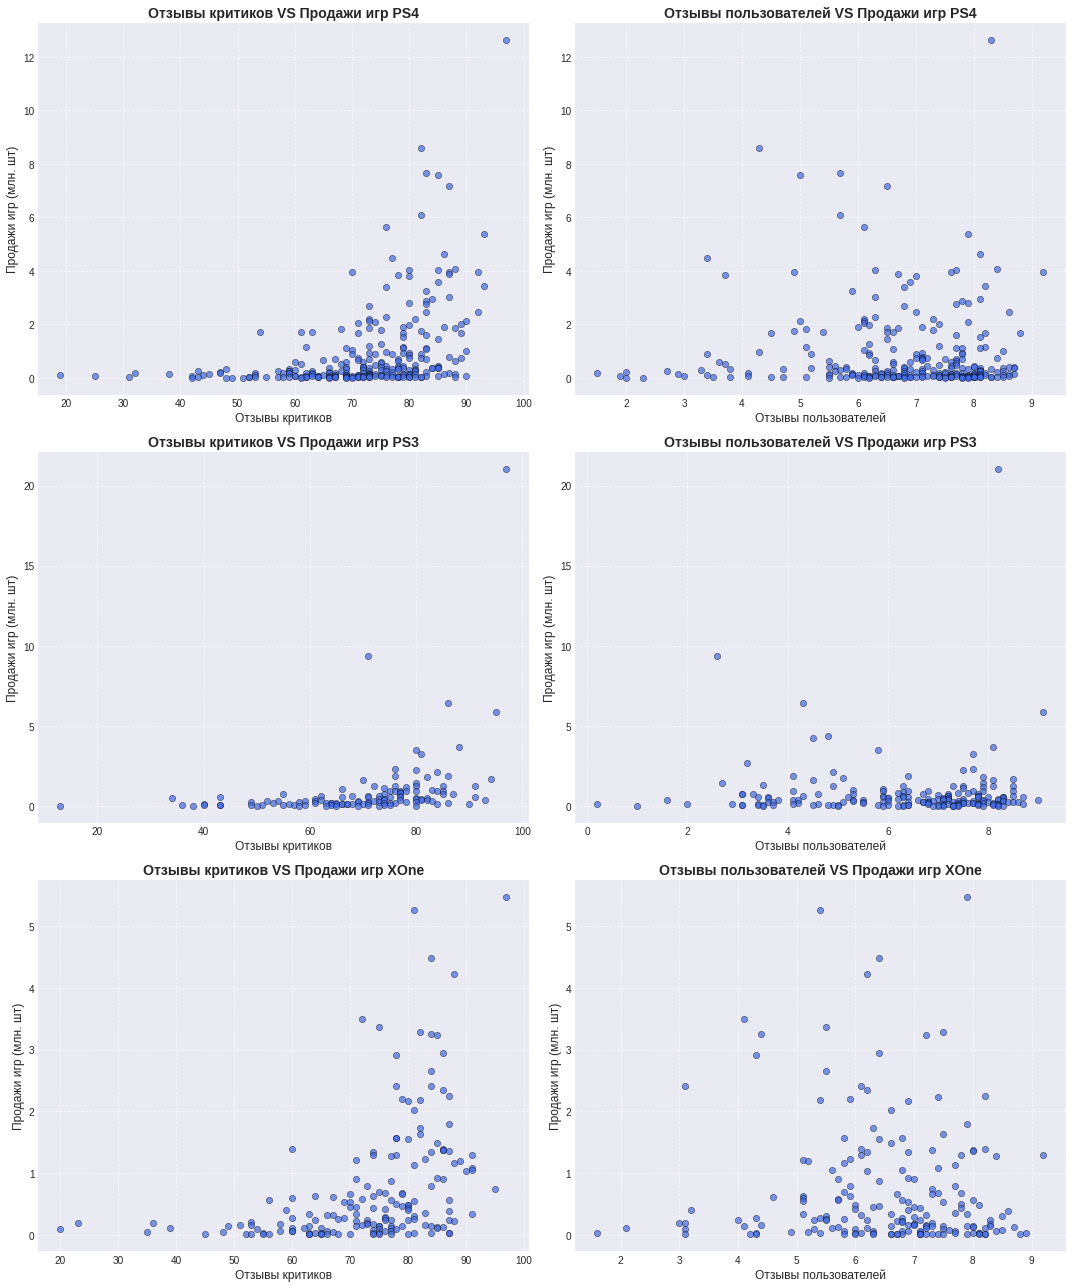

In [47]:
# Установим стиль
plt.style.use('seaborn-darkgrid')

# Список метрик для оси X
score_list = ['critic_score', 'user_score']

# ТОП-3 платформ
top_3_platforms = list(df_actual_platform_sales.index[:3])

# Размеры фигуры
fig, axes = plt.subplots(len(top_3_platforms), 2, figsize=(15, 6 * len(top_3_platforms)))

# Заголовки и подписи
title_dict = {
    'critic_score': 'Отзывы критиков VS Продажи игр',
    'user_score': 'Отзывы пользователей VS Продажи игр'
}
xlabel_dict = {
    'critic_score': 'Отзывы критиков',
    'user_score': 'Отзывы пользователей'
}

# Цикл по платформам и метрикам
for row, platform in enumerate(top_3_platforms):
    df_platform = df_actual.query(f'platform == "{platform}"')
    
    for col, score in enumerate(score_list):
        ax = axes[row, col] if len(top_3_platforms) > 1 else axes[col]
        
        sns.scatterplot(
            data=df_platform,
            x=score,
            y='total_sales',
            ax=ax,
            color='royalblue',
            edgecolor='black',
            s=40,
            alpha=0.7
        )
        
        ax.set_title(f'{title_dict[score]} {platform}', fontsize=14, fontweight='bold')
        ax.set_xlabel(xlabel_dict[score], fontsize=12)
        ax.set_ylabel('Продажи игр (млн. шт)', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Из выведенных диаграмм рассеяния видно, что есть слабая линейная зависимость продаж от оценок критиков, от оценок пользователей зависимость совсем никакая.

Рассмотрим матрицу корреляции.

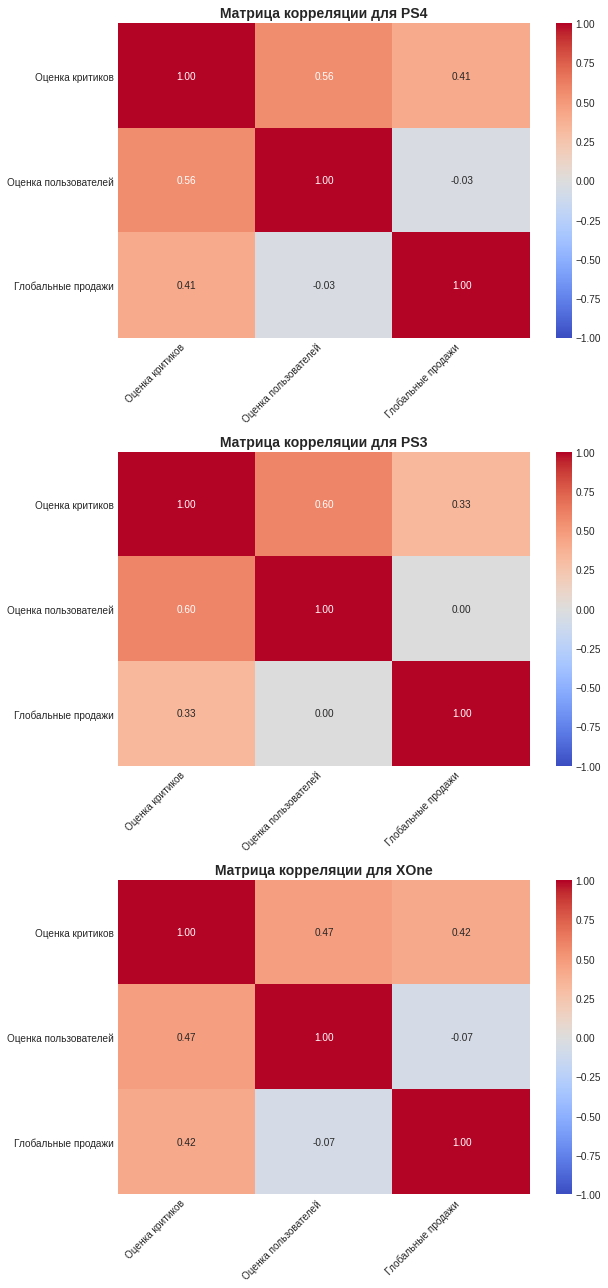

In [48]:
# ТОП-3 платформ
top_3_platforms = list(df_actual_platform_sales.index[:3])

# Названия параметров
correlation_labels = [
    'Оценка критиков',
    'Оценка пользователей',
    'Глобальные продажи'
]

# Размер фигуры
fig, axes = plt.subplots(len(top_3_platforms), 1, figsize=(9, 6 * len(top_3_platforms)))

# Цикл по платформам
for i, platform in enumerate(top_3_platforms):
    df_platform = df_actual.query(f'platform == "{platform}"')
    corr_matrix = df_platform[['critic_score', 'user_score', 'total_sales']].corr()
    
    ax = axes[i] if len(top_3_platforms) > 1 else axes
    sns.heatmap(
        corr_matrix,
        vmin=-1,
        vmax=1,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        yticklabels=correlation_labels,
        xticklabels=correlation_labels,
        ax=ax
    )
    
    ax.set_title(f'Матрица корреляции для {platform}', fontsize=14, fontweight='bold')
    ax.set_xticklabels(correlation_labels, rotation=45, ha='right')
    ax.set_yticklabels(correlation_labels, rotation=0)

plt.tight_layout()
plt.show()


Для всех платформ из ТОП-3 прослеживатеся небольшая зависимость продаж от оценок критиков, но она совсем несущественная, а зависимость продаж от оценок пользователей слабо отрицательная или ее совсем нет, но явно наблюдается зависимость оценок критиков и пользователей между собой.

*Значит при прогнозе продаж не стот ориентироваться на оценки критиков и пользователй.*


**Основной вывод:**
Основываясь на диаграммы рассеивания и матрицу корреляции зависимости суммарных продаж по платформам и оценок критиков и пользователей, подтверждается теория, что зависимости продаж от оценок пользователей практически нет, а от оценок критиков эта зависимость незначительна. Следовательно при планировании продаж на 2017 год не стоит опираться на оценки игр.

#### Распределение игр по жанрам.

Для того что бы определить самые популярные жанры игр посмотрю на медианные продажи по жанрам. Беру медианные продажи, т.к. суммарные продажи не показательны - может быть жанр, в котором просто много игр, но они все продаются плохо, а еще медиана в отличии от среднего более устойчива к выбросам и аномалиям.

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


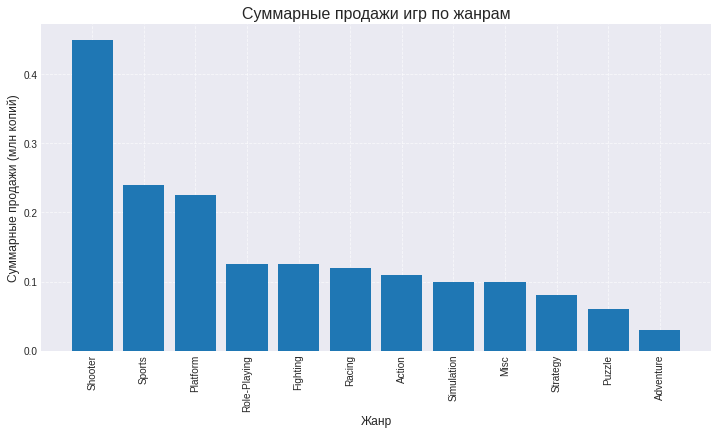

In [49]:
df_actual_genre_sales = pd.pivot_table(df_actual,
                                               index='genre',
                                               values='total_sales',
                                               aggfunc='median')

df_actual_genre_sales = df_actual_genre_sales.sort_values(by='total_sales',
                                                                          ascending=False)     
    
display(df_actual_genre_sales)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(df_actual_genre_sales.index, df_actual_genre_sales['total_sales'])

# Настраиваем подписи и заголовки
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Суммарные продажи (млн копий)', fontsize=12)
plt.title('Суммарные продажи игр по жанрам', fontsize=16)
plt.xticks(rotation=90) 
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [50]:
# список названий ТОП-5 жанров
print('ТОП-5 жанров по медианным продажам:', list(df_actual_genre_sales.index[:5]))

ТОП-5 жанров по медианным продажам: ['Shooter', 'Sports', 'Platform', 'Role-Playing', 'Fighting']


Самым популярными жанром по продажам игр являются Shooter', остальные жанры значительно отстают по продажам. На втором и третьем местах 'Sports', 'Platform' с разницейв 50% от 'Shooter'.

В аутсайдерах по продажам жанр 'Adventure' - отстает от лидера 'Adventure' на 93%.

**Описание выделенных жанров:**
- *Shooter*: (шутер) — поджанр Action, сосредоточенный на стрельбе. Игры могут быть от первого лица (FPS) или третьего лица (TPS). Главное в шутерах — точность стрельбы, выбор оружия и тактика.
- *Sports*: (спортивные игры) — игры, симулирующие реальные или вымышленные спортивные соревнования.
- *Platform*:(платформеры) - гры, в которых персонаж перемещается по уровням, прыгая по платформам, избегая препятствий и сражаясь с врагами. Геймплей обычно строится на точном управлении движениями персонажа, а уровни часто содержат секретные пути и бонусы.
- *Adventure*: (приключенческие игры) - игры, ориентированные на сюжет, исследование мира и решение головоломок. Чаще всего в них меньше экшена, чем в жанре Action, а основное внимание уделяется истории, взаимодействию с персонажами и изучению окружения. В приключенческих играх важно погружение в атмосферу и постепенное раскрытие сюжета.

Посмотрю на продажи игр по жанрам на графике "Ящик с усами".

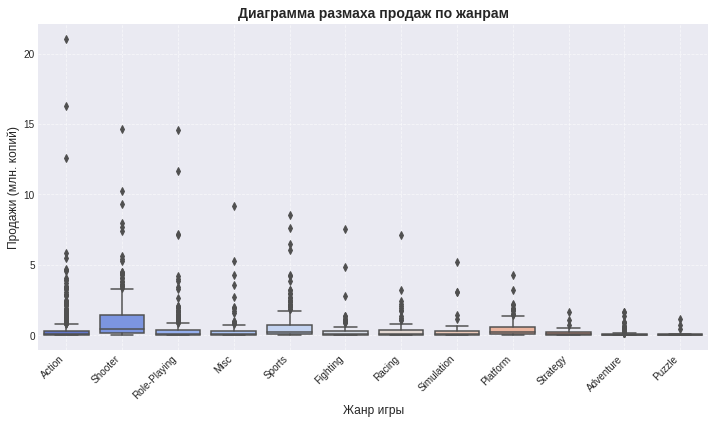

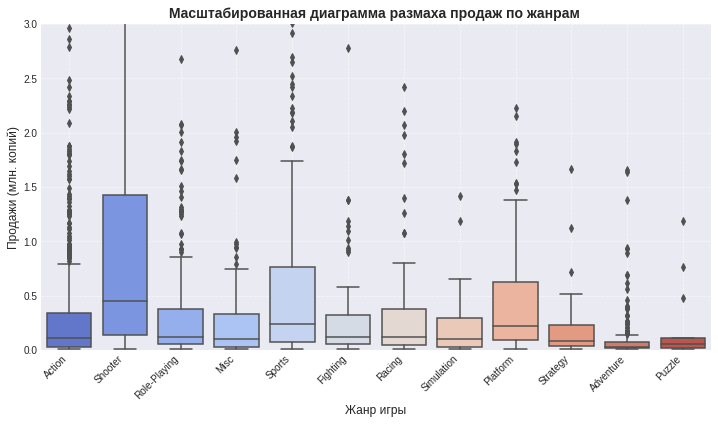

In [51]:
# Оригинальная диаграмма размаха для продаж по жанрам (все платформы)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_actual,
    x='genre',
    y='total_sales',
    palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Продажи (млн. копий)', fontsize=12)
plt.title('Диаграмма размаха продаж по жанрам', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Масштабированная диаграмма размаха (лимит 0-3 млн. шт)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_actual,
    x='genre',
    y='total_sales',
    palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Продажи (млн. копий)', fontsize=12)
plt.title('Масштабированная диаграмма размаха продаж по жанрам ', fontsize=14, fontweight='bold')
plt.ylim(0, 3)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



**На основе диаграммы размаха продаж игр по жанрам можно сделать несколько выводов:**
- Диаграмма размаха подтверждает, что не следует определять жанр-лидера по суммарным продажам, например "Action" - игр в этом жанре много, присутствует большое количество выбросов, но 75% игр по продажам не превышают и пол миллиона копий.
- Жанр "Shooter" лидирует по продажам – у него наиболее высокий медианный уровень продаж, а также значительное количество игр с высокими продажами (много выбросов сверху). Так же в лидерах продаж "Sports" и "Platform"/
- Жанры "Adventure", "Puzzle" и "Strategy" имеют самые низкие продажи – у них низкая медиана, а верхний квартиль не превышает отметку в 1 миллион копий.
- Большое количество выбросов в популярных жанрах – особенно у "Shooter", "Sports" и "Action", что говорит о наличии хитов, сильно превосходящих средние продажи.

*В целом, можно заключить, что индустрия видеоигр сильно зависит от жанра: одни жанры приносят гораздо больше доходов, чем другие.*


### Выводы по исследовательскому анализу.
**В ходе исследовательского анализа были выполнены следующие работы:**
1. определено количество выпускаемых игр по годам.
2. определено количество продаж игр по платформам.
3. определен актуальный период данных для прогноза продаж на 2017 год.
4. проведен анализ данных за актуальный период:
    - определены лидирующие платформы по продажам игр,
    - изучен график "ящик с усами" по платформам,
    - изучено влияние оценки критиков и пользователей на продажи игр,
    - изучено распределение продаж игр по жанрам.
    
**Общие выводы:**
1. ***Количество выпускаемых игр по годам*** - с 1980 и вплоть до 1993 года выпускалось очень малое количество игр. Рост выпуска игр начался с 1994, а пик (максимальное количество выпускаемых игр) пришелся на 2008-2009 годы, после 2009 начался спад выпуска игр.
2. ***Количество продаж игр по платформам*** -  есть ТОП-6 платформ с суммарными продажами, остальные платформы значительно отстают от ТОП-овых по продажам игр. ТОП-6 платформ по суммарным продажам за весь период с 1980 по 2016 гг: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']. По всем ТОП-ым платформам наблюдается резкий старт продаж, средний срок жизни платформы 7 лет, с пиком продаж игр на 4-6 год жизни платформы, далее в течении 4-6 лет идет спад продаж и снятие платформы с продажи.
3. ***Актуальный период данных для прогноза продаж на 2017 год: 2013- 2016 гг.*** - поскольку платформы живут в среднем около 7 лет с пиком на 4-6 годах, то актуальные тренды лучше всего отражают последние 3-4 года, в данном случае это 2013-2016 годы, этот период позволит учесть последние активные платформы, а также спад продаж, что важно для прогноза на 2017 год.
4. ***Анализ данных за актуальный период (2013- 2016 гг.):***
    - *лидирующие платформы* ТОП-5 платформ по суммарным продажам: 'PS4', 'PS3', 'XOne', '3DS', 'X360'. После 2013 года продажи большинства платформ падают, за исключением PS4, XOne, т.к. эти платформы нового поколеня, пришедшие на смену старым, для этих платформ 2014 и 2015 годы - пик продаж.
    - *Ящик с усами* - рафик четко показывает явных лидеров по продажам за актуальный период - это ТОП-5 платформ и четко показывает на сколько сильно медианные продажи этих платформ выше, чем у остальных. Так же видно, что в явных аутсайдерах PSP.
    - *влияние оценки критиков и пользователей на продажи игр* основываясь на диаграмму рассеивания и матрицу корреляции выявлено, что зависимости продаж от оценок пользователей практически нет, а от оценок критиков эта зависимость незначительна. Следовательно при планировании продаж на 2017 год не стоит опираться на оценки игр.
    - *распределение игр по жанрам** самыми популярными жанрами по продажам игр являются 'Shooter', 'Sports', 'Platform', остальные жанры значительно отстают по продажам. В аутсайдерах по продажам жанр 'Adventure' - отстает от лидера 'Shooter' на 93%.

## Портрет пользователя каждого региона.

**Необходимо определить для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для ответа на эти вопросы напишу функцию, которая будет выводить графики по ТОП-5 платформам, ТОП-5 жанрам и как влияет рейтинг ESRB на продажи в каждом регионе.

In [53]:
# Установим стиль
plt.style.use('seaborn-darkgrid')

# Функция для построения круговых диаграмм (ТОП-5 + "Другие")
def region_pie(column):
    rows, cols = 1, 3
    fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

    # Список регионов продаж
    region_list = ['na_sales', 'eu_sales', 'jp_sales']
    
    # Заголовки
    title_dict = {
        'na_sales': 'Продажи в Северной Америке',
        'eu_sales': 'Продажи в Европе',
        'jp_sales': 'Продажи в Японии'
    }

    for i, region in enumerate(region_list):
        # Агрегируем данные
        df_region = (df_actual
                     .groupby(column)[region]
                     .sum()
                     .sort_values(ascending=False))
        
        # ТОП-5 значений
        top_5 = df_region.head(5)
        
        # Остальные категории объединяем в "Другие"
        other_sales = df_region.iloc[5:].sum()
        top_5['Другие'] = other_sales

        # Построение круговой диаграммы
        ax = axes[i]
        top_5.plot(
            kind='pie',
            ax=ax,
            autopct='%1.1f%%',
            startangle=140,
            wedgeprops={'edgecolor': 'black'},
            textprops={
                'fontsize': 18,          # Размер шрифта для процентов и подписей
                'color': 'black'         # Цвет текста
            },
            radius=1.1                  # Увеличивает размер диаграммы
        )

        # Настройки графика
        ax.set_title(title_dict[region], fontsize=18, fontweight='bold')
        ax.set_ylabel('')  # Убираем подпись оси Y для красоты

    plt.tight_layout()
    plt.show()


### ТОП-5 популярных платформ для каждого региона.

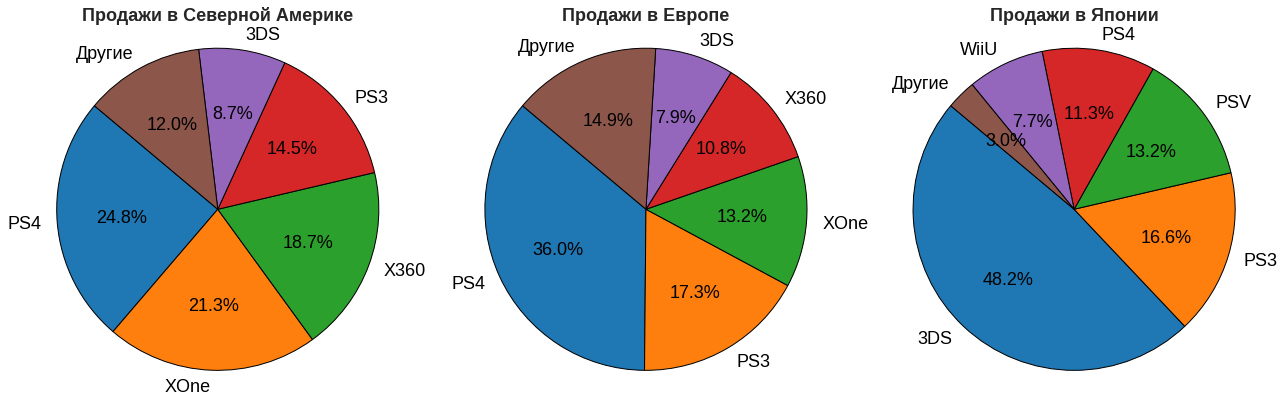

In [54]:
# график популярных платформ
#region('platform')

# Круговая диаграмма по платформам
region_pie('platform')

**Анализ ТОП-5 платформ по регионам.**
1. **В Северной Амереке** пользуются популярностью платформы:
    - PS4, XOne, X360, PS3, 3DS;
    - очевидных лидеров среди ТОП-5 можно выделить PS4, XOne, остальные платформы значительно отстают от них по продажам;
    - особенность региона: Преобладание консолей Microsoft (X360, XOne) и Sony (PS4, PS3), мобильные консоли (3DS) менее популярны
2. **В Европе** пользуются популярностью платформы:
    - PS4, XOne, X360, PS3, 3DS;
    - очевидного лидера среди ТОП-5 можно выделить PS4, остальные платформы значительно отстают от нее по продажам;
    - особенность региона: Доминирование PlayStation (PS4), но X360 также популярен.
2. **В Япони** пользуются популярностью платформы:
    - 3DS, PS3, PSV, PS4, WiiU;
    - очевидных лидеров среди ТОП-5 можно выделить 3DS и PS3, остальные платформы значительно отстают от них по продажам;
    - особенность региона: Япония — страна портативных консолей. Доминируют 3DS, PS3 и PSV, в то время как на Западе популярны домашние консоли.
    
**Общий вывод:**
- В Северной Америке и Европе доминируют домашние консоли (PS4, XOne).
- В Японии ключевую роль играют портативные консоли (3DS, PS3).

### ТОП-5 популярных жанров по регионам.

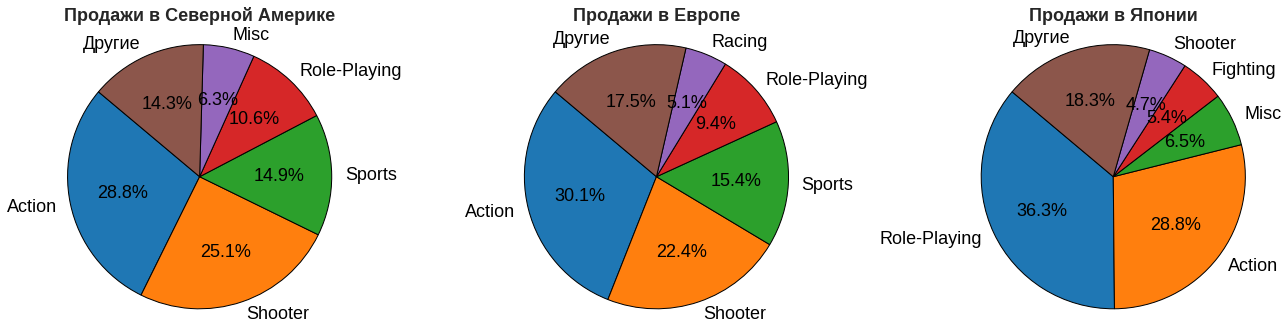

In [55]:
# график популярных жанров
# region('genre')

# Круговая диаграмма по жанрам
region_pie('genre')

**Анализ ТОП-5 жанров по регионам.**
1. **В Северной Амереке** пользуются популярностью жанры:
    - Action, Shooter, Sports, Role-Playing, Misc;
    - очевидных лидеров среди ТОП-5 можно выделить Action, Shooter, остальные жанры значительно отстают от них по продажам;
    - особенность региона: Популярность экшена и шутеров, что связано с влиянием консольных игр (Call of Duty, GTA, Halo) и предпочтениями западных игроков.
2. **В Европе** пользуются популярностью жанры:
    - Action, Shooter, Sports, Role-Playing, Racing;
    - очевидных лидеров среди ТОП-5 можно выделить Action, Shooter (так же как для Северной Америки), остальные жанры значительно отстают от них по продажам;
    - особенность региона: Гонки популярны в Европе, что связано с культурой автоспорта (F1, Gran Turismo, Need for Speed).
2. **В Япони** пользуются популярностью жанры:
    - Role-Playing, Action, Misc, Fighting, Platform;
    - очевидных лидеров среди ТОП-5 можно выделить Role-Playing, Action, остальные платформы значительно отстают от них по продажам;
    - особенность региона: RPG доминирует благодаря японским франшизам (Final Fantasy, Pokémon, Dragon Quest), а платформеры и файтинги традиционно сильны в Японии (Super Mario, Street Fighter, Tekken).
    
**Общий вывод:**
- В Северной Америке и Европе доминируют Action и Shooter, отражая любовь к динамичным играм и шутерам.
- В Японии лидируют RPG и Action, что связано с историей и культурой японского геймдева.
- Гонки (Racing) популярны только в Европе.
- Файтинги (Fighting) и платформеры (Platform) востребованы в Японии, но мало распространены на Западе.
- Таким образом, жанровые предпочтения сильно зависят от региона и игровой культуры.

### Влияние рейтинга ESRB на продажи в каждом регионе.

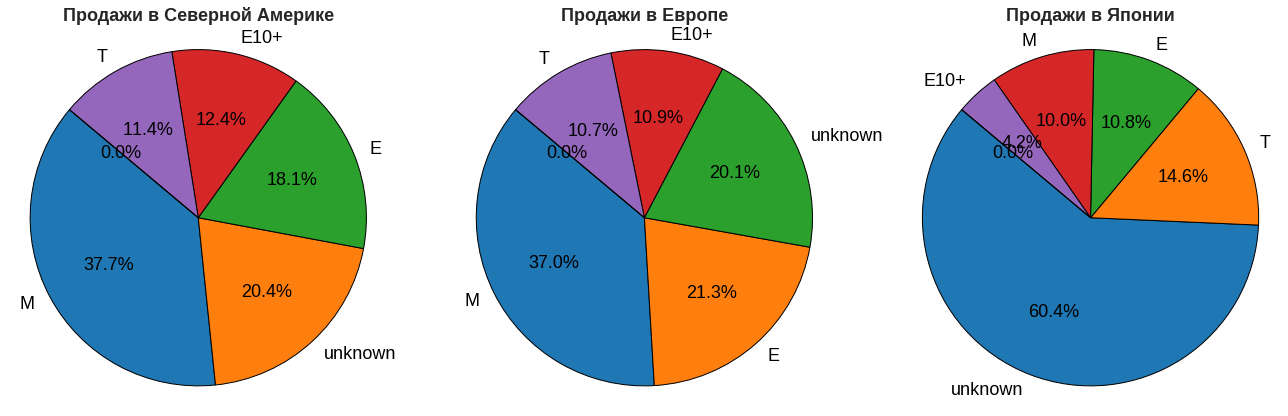

In [56]:
# график влияния рейтинга ESRB 
# region('rating')

# Круговая диаграмма по рейтингу ESRB
region_pie('rating')

**Анализ влияния рейтинга ESRB на продажи в каждом регионе.**
1. **В Северной Амереке** лучше продаются игры с рейтингами:
    - М, Е,Е10+,T;
    - очевидного лидера среди рейтингов можно выделить М (37,7%), остальные рейтинги значительно отстают;
    - так же велика доля игр, для котороых возрастной рейтинг не указан 20,4%, что может быть связано с играми, которые не предназначены для американского рынка или с независимыми разработками;
    - американская аудитория предпочитает игры для взрослых (шутеры, экшены, RPG).
2. **В Европе** пользуются популярностью игры с рейтингами:
    - М, Е, Е10+, Т;
    - очевидных лидеров среди рейтингов можно выделить М (37%) и Е (21%), остальные рейтинги значительно отстают;
    - так же велика доля игр для которых возрастной рейтинг не указан (20%), что также может указывать на игры, ориентированные на более широкую аудиторию или независимые проекты;
    - предпочтения схожи с Северной Америкой – спрос на игры с жестокими сценами, взрослым сюжетом и сложными механиками.
2. **В Япони** пользуются популярностью жанры:
    - Т, Е, М, Е10+;
    - очевидного лидера среди рейтингов можно выделить Т (14%), остальные рейтинги отстают;
    - большая часть продаваемых игр (60%), для которых возрастной рейтинг не указан, т.к. рейтинг ESRB предназначен для маркировки игр в США и Канаде, а японский рынок использует другую систему рейтинга (например, CERO);
    - японская аудитория отдает предпочтение играм для подростков (RPG, аниме-игры, файтинги).
    
***Общий вывод:***
- влияние рейтинга ESRB на продажи игр очевидно в Северной Америке и Европе, где игры с рейтингом М (для взрослых) и Т (для подростков) пользуются спросом среди различных возрастных групп.
- в Японии более популярны игры с рейтингом Т, отражая культурные особенности. 
- отсутствие ESRB рейтинга играет большую роль на японском рынке, где используется другая система рейтинга, и в меньшей степени в Северной Америке и Европе, где наличие рейтинга критично для продвижения и продаж.

*Влияние рейтинга ESRB на продажи связано не только с возрастными ограничениями, но и с жанровыми предпочтениями, культурными особенностями каждого региона и используемыми системами рейтинга.*

### Общий портрет пользователя по регионам.

1. **Северная Америка 🇺🇸**
- Предпочитаемые платформы: PS4, XOne, X360, PS3.
- Жанры: Action, Shooter, Sports, Role-Playing.
- Рейтинг ESRB: 
    - M (Mature, 17+) – самый популярный;
    - 20,4% игр не имеют рейтинга, что может быть связано с играми, которые не предназначены для американского рынка или с независимыми разработками.

*Портрет игрока:*
Американская аудитория предпочитает консоли от Sony и Microsoft, а также игры экшн и шутеры с высоким возрастным рейтингом. 

2. **Европа 🇪🇺**
- Предпочитаемые платформы: PS4, XOne, X360, PS3.
- Жанры: Action, Shooter, Sports, Role-Playing, Racing – как в США, но дополнительно популярен Racing.
- Рейтинг ESRB: 
    - M (Mature, 17+) – доминирует;
    - 20% игр не имеют рейтинга, что может указывать на игры, ориентированные на более широкую аудиторию или независимые проекты.

*Портрет игрока:*
Европейцы также любят экшены и шутеры, но более открыты к гонкам. PlayStation и Xbox популярны, а также PC-гейминг.

3. **Япония 🇯🇵**
- Предпочитаемые платформы: 3DS, PS3, PSV, PS4, WiiU.
- Жанры: Role-Playing, Action, Misc, Fighting, Platform.
- Рейтинг ESRB:
    - T (Teen, 13+) – самый популярный;
    - 60% игр, для которых возрастной рейтинг не указан, т.к. рейтинг ESRB предназначен для маркировки игр в США и Канаде, а японский рынок использует другую систему рейтинга (например, CERO).

*Портрет игрока:*
Японские геймеры любят портативные консоли (3DS, PSP, PSV) и RPG с аниме-стилем. Игры часто ориентированы на сюжет и тактику, а не экшен.

**Таким образом, несмотря на общие тенденции, культурные и жанровые предпочтения пользователей в разных регионах могут значительно отличаться, что влияет на выбор платформ и игр.**

## Проверка гипотез.
 В качестве нулевой гипотезы в обоих ниже приведенных задачах будет проверяться равенство срендних значений двух параметров. В качестве альтернативной гипотезы отсутствие их равенства.
В качестве критерия проверки гипотезы будет использоваться пороговое значение alpha = 5% (.05). Подобное значение выбрано из двух общепринятых 1% и 5%, в свзи с тем, что проверяются значения не требующие высокой точности.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Задам нулевую и альтернативную гипотезы:**
- *H_0* - средние пользовательские рейтинги платформ Xbox One и PC равны.
- *H_1* - средние пользовательские рейтинги платформ Xbox One и PC различаются.

**Уровень статистической значимости:** alpha = 0.05 (5%).

In [57]:
# Оценки пользователей игр для платформы Xbox
xbox_user_score = (
    df_actual.query('platform == "XOne"')['user_score']
)

# Оценки пользователей игр для платформы PC
pc_user_score = (
    df_actual.query('platform == "PC"')['user_score']
)
print('средние пользовательские рейтинги платформ Xbox One:', df_actual.query('platform == "XOne"')['user_score'].mean())
print('средние пользовательские рейтинги платформ PC:', df_actual.query('platform == "PC"')['user_score'].mean())

# Уровень статистической значимости
alpha=0.05

# Статистический тест (nan_policy='omit': игнорирует вхождения nan во входных данных)
results = st.ttest_ind(xbox_user_score, pc_user_score, nan_policy='omit', equal_var=True)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

средние пользовательские рейтинги платформ Xbox One: 6.521428571428572
средние пользовательские рейтинги платформ PC: 6.269677419354839
p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) НЕТ оснований отвергнуть нулевую гипотезу (средние пользовательские рейтинги платформ Xbox One и PC равны) в пользу альтернативной (средние пользовательские рейтинги платформ Xbox One и PC различаются).

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Задам нулевую и альтернативную гипотезы:**
- *H_0* - средние пользовательские рейтинги жанров Action и Sports равны.
- *H_1* - средние пользовательские рейтинги жанров Action и Sports различаются.

**Уровень статистической значимости:** alpha = 0.05 (5%).

In [58]:
# Оценки пользователей игр для платформы Action
action_genre = (
    df_actual.query('genre == "Action"')['user_score']
)

# Оценки пользователей игр для платформы Sports
sports_genre = (
    df_actual.query('genre == "Sports"')['user_score']
)
print('средние пользовательские рейтинги жанра Action:', df_actual.query('genre == "Action"')['user_score'].mean())
print('средние пользовательские рейтинги жанра Sports:', df_actual.query('genre == "Sports"')['user_score'].mean())

# Уровень статистической значимости
alpha=0.05

# Статистический тест (nan_policy='omit': игнорирует вхождения nan во входных данных)
results = st.ttest_ind(action_genre, sports_genre, nan_policy='omit', equal_var=True)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

средние пользовательские рейтинги жанра Action: 6.837532133676093
средние пользовательские рейтинги жанра Sports: 5.238124999999999
p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


**Вывод:**
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) ЕСТЬ основания отвергнуть нулевую гипотезу (средние пользовательские рейтинги жанров Action и Sports равны) в пользу альтернативной (средние пользовательские рейтинги жанров Action и Sports различаются).

### Вывод по результатам проверки гипотез.

1. В качестве нулевой гипотезы в обоих задачах проверялось равенство среднних значений двух параметров. В качестве альтернативной гипотезы отсутствие их равенства.
2. В качестве критерия проверки гипотезы использовала пороговое значение alpha = 5% (.05). Подобное значение выбрано из двух общепринятых 1% и 5%, в свзи с тем, что проверяются значения не требующие высокой точности.
3. Выбранный метод: t-тест для независимых выборок.t-тест подходит для сравнения средних значений двух независимых групп. Этот метод позволяют статистически обоснованно определить, есть ли значимые различия между средними значениями в сравниваемых группах.

**Результаты проверки гипотез:**
1. На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) НЕТ оснований отвергнуть нулевую гипотезу (средние пользовательские рейтинги платформ Xbox One и PC равны) в пользу альтернативной (средние пользовательские рейтинги платформ Xbox One и PC различаются).
2. На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) ЕСТЬ основания отвергнуть нулевую гипотезу (средние пользовательские рейтинги жанров Action и Sports равны) в пользу альтернативной (средние пользовательские рейтинги жанров Action и Sports различаются).

## Общие выводы и предложения.

**В ходе анализа игровых данных была проведена следующая работа:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ
4. Составлен портрет пользователя по регионам
5. Проверка гипотез.

<font color='violet'><b>Предобработка данных</b></font><br>

**В ходе предобработке было выполнено следующее:**
- анализ статистических данных,
- обработка пропусков,
- изменение типов данных,
- обработка дубликатов,
- добавлено поле с суммарными продажами по всем регионам.

**Выводы по предобработке:**
1. ***Анализ статистических данных***
    - много информации в анализируемых данных отсутствует.
    - анализируемые игры с годами выпуска от 1980 до 2016.
    - большинство игр продается плохо; высокий разброс продаж — есть как хиты с десятками миллионов копий, так и провальные игры; 25% игр вообще не имеют продаж; рынок конкурентный, но лишь немногие игры становятся суперуспешными.
    - большинство игр получает положительные оценки (60–79 баллов), но не дотягивает до 100 баллов; половина игр оценивается выше 71, что говорит о склонности критиков к мягкой оценке; не все игры получили оценки (оценки есть только у 8137 из 16715 игр).
    - в оценках пользователей большинство игр имеют значение 'tbd' ("To Be Determined") - оценка еще не выставлена или не определена, это значение для дальнейшего анализа заменила на Nan.
    
2. ***Обработка пропусков***
     - в данных отсутствует информация в Оценка пользователей (54,5%) Оценка критиков (51,3%), Рейтинг (возростная категория) от организации ESRB (40,4%), Год выпуска игр (1,6%), Название и Жанр игры менее 1%.
    - *предполагаемые причины*, которые повлияли на появление пропусков в данных - технический сбой при выгрузке данных, нехватка отзывов, отсутствие рецензий, недоступность источников, проблемы с классификацией, отсутствие официальной даты, не указана информация.
    - строки без года выпуска, названия игры и жанра удалила, доля удаленной информации составила 1,6%.
    - Nan в поле 'rating' заменила на наиболее часто встречающийся рейтинг для каждого жанра ('genre').
    - пропуски с Оценнками оставила как есть, т.к. это уникальная информация и ей нет логичной замены.
    
3. ***Замена типов данных -***
типы данных изменила в полях:
    - 'year_of_release' с float64 на datetime, т.к. указан год выпуска игры;
    - 'user_score' с object на float64, т.к. оценка пользователей - это числовое значение.

4. ***Дубликаты*** в анализируемых данных:
    - явные дубликаты отсутствуют,
    - удалена одна строка с игрой madden nfl 13, которая была дубликатом одновременно по названию, платформе и году релиза.
5. ***Добавила поле*** 'total_sales' с суммарными продажами по всем регионам.

<font color='violet'><b>Исследовательский анализ.</b></font><br>

**В ходе исследовательского анализа были выполнены следующие работы:**
1. определено количество выпускаемых игр по годам.
2. определено количество продаж игр по платформам.
3. определен актуальный период данных для прогноза продаж на 2017 год.
4. проведен анализ данных за актуальный период:
    - определены лидирующие платформы по продажам игр,
    - изучен график "ящик с усами" по платформам,
    - изучено влияние оценки критиков и пользователей на продажи игр,
    - изучено распределение продаж игр по жанрам.
    
**Общие выводы:**
1. ***Количество выпускаемых игр по годам*** - с 1980 и вплоть до 1993 года выпускалось очень малое количество игр. Рост выпуска игр начался с 1994, а пик (максимальное количество выпускаемых игр) пришелся на 2008-2009 годы, после 2009 начался спад выпуска игр.
2. ***Количество продаж игр по платформам*** -  есть ТОП-6 платформ с суммарными продажами, остальные платформы значительно отстают от ТОП-овых по продажам игр. ТОП-6 платформ по суммарным продажам за весь период с 1980 по 2016 гг: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']. По всем ТОП-ым платформам наблюдается резкий старт продаж, средний срок жизни платформы 7 лет, с пиком продаж игр на 4-6 год жизни платформы, далее в течении 4-6 лет идет спад продаж и снятие платформы с продажи.
3. ***Актуальный период данных для прогноза продаж на 2017 год: 2013- 2016 гг.*** - поскольку платформы живут в среднем около 7 лет с пиком на 4-6 годах, то актуальные тренды лучше всего отражают последние 3-4 года, в данном случае это 2013-2016 годы, этот период позволит учесть последние активные платформы, а также спад продаж, что важно для прогноза на 2017 год.
4. ***Анализ данных за актуальный период (2013- 2016 гг.):***
    - *лидирующие платформы* ТОП-5 платформ по суммарным продажам: 'PS4', 'PS3', 'XOne', '3DS', 'X360'. После 2013 года продажи большинства платформ падают, за исключением PS4, XOne, т.к. эти платформы нового поколеня, пришедшие на смену старым, для этих платформ 2014 и 2015 годы - пик продаж.
    - *Ящик с усами* - график четко показывает явных лидеров по продажам за актуальный период - это ТОП-5 платформ и четко показывает на сколько сильно медианные продажи этих платформ выше, чем у остальных. Так же видно, что в явных аутсайдерах PSP.
    - *влияние оценки критиков и пользователей на продажи игр* основываясь на диаграмму рассеивания и матрицу корреляции выявлено, что зависимости продаж от оценок пользователей практически нет, а от оценок критиков эта зависимость незначительна. Следовательно при планировании продаж на 2017 год не стоит опираться на оценки игр.
    - *распределение игр по жанрам** самыми популярными жанрами по медианным продажам игр являются 'Shooter', 'Sports', 'Platform', остальные жанры значительно отстают по продажам. В аутсайдерах по продажам жанр 'Adventure' - отстает от лидера 'Shooter' на 93%. Жанры анализировались по медианным продажам,  т.к. суммарные продажи не показательны - может быть жанр, в котором просто много игр, но они все продаются плохо, а еще медиана в отличии от среднего более устойчива к выбросам и аномалиям
    
<font color='violet'><b>Портрет пользователя по регионам.</b></font><br>

***Портрет пользователя для каждого региона составлен на основе анализа ТОП-5 популярных платформ в каждом регионе, ТОП-5 полпулярных жанров (по суммарным продажам) в каждом регионе и рейтинга ESRB для каждого региона.***

1. **Северная Америка 🇺🇸**
- Предпочитаемые платформы: PS4, XOne, X360, PS3.
- Жанры: Action, Shooter, Sports, Role-Playing.
- Рейтинг ESRB: 
    - M (Mature, 17+) – самый популярный;
    - 20,4% игр не имеют рейтинга, что может быть связано с играми, которые не предназначены для американского рынка или с независимыми разработками.

*Портрет игрока:*
Американская аудитория предпочитает консоли от Sony и Microsoft, а также игры экшн и шутеры с высоким возрастным рейтингом. 

2. **Европа 🇪🇺**
- Предпочитаемые платформы: PS4, XOne, X360, PS3.
- Жанры: Action, Shooter, Sports, Role-Playing, Racing – как в США, но дополнительно популярен Racing.
- Рейтинг ESRB: 
    - M (Mature, 17+) – доминирует;
    - 20% игр не имеют рейтинга, что может указывать на игры, ориентированные на более широкую аудиторию или независимые проекты.

*Портрет игрока:*
Европейцы также любят экшены и шутеры, но более открыты к гонкам. PlayStation и Xbox популярны, а также PC-гейминг.

3. **Япония 🇯🇵**
- Предпочитаемые платформы: 3DS, PS3, PSV, PS4, WiiU.
- Жанры: Role-Playing, Action, Misc, Fighting, Platform.
- Рейтинг ESRB:
    - T (Teen, 13+) – самый популярный;
    - 60% игр, для которых возрастной рейтинг не указан, т.к. рейтинг ESRB предназначен для маркировки игр в США и Канаде, а японский рынок использует другую систему рейтинга (например, CERO).

*Портрет игрока:*
Японские геймеры любят портативные консоли (3DS, PSP, PSV) и RPG с аниме-стилем. Игры часто ориентированы на сюжет и тактику, а не экшен.

***Таким образом, несмотря на общие тенденции, культурные и жанровые предпочтения пользователей в разных регионах могут значительно отличаться, что влияет на выбор платформ и игр.***

<font color='violet'><b>Проверка гипотез.</b></font><br>

1. Проверялись гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Средние пользовательские рейтинги жанров Action и Sports разные.
2. В качестве нулевой гипотезы в обоих задачах проверялось равенство срендних значений двух параметров. В качестве альтернативной гипотезы отсутствие их равенства.
3. В качестве критерия проверки гипотезы использовала пороговое значение alpha = 5% (.05). Подобное значение выбрано из двух общепринятых 1% и 5%, в свзи с тем, что проверяются значения не требующие высокой точности.
4. Выбранный метод: t-тест для независимых выборок.t-тест подходит для сравнения средних значений двух независимых групп. Этот метод позволяют статистически обоснованно определить, есть ли значимые различия между средними значениями в сравниваемых группах.


**Результаты проверки гипотез:**
1. На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) НЕТ оснований отвергнуть нулевую гипотезу (средние пользовательские рейтинги платформ Xbox One и PC равны) в пользу альтернативной (средние пользовательские рейтинги платформ Xbox One и PC различаются).
2. На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) ЕСТЬ основания отвергнуть нулевую гипотезу (средние пользовательские рейтинги жанров Action и Sports равны) в пользу альтернативной (средние пользовательские рейтинги жанров Action и Sports различаются).


<font color='violet'><b>Общие выводы по проекту.</b></font><br>
1.	**Платформы для продвижения**
    - Лидерами продаж за актуальный период (2013–2016 гг.) являются PS4, PS3, XOne, 3DS, X360. Из них PS4 и XOne продолжают демонстрировать рост, что делает их наиболее перспективными для 2017 года.
    - В Японии популярны портативные консоли (3DS, PSV), что требует отдельного подхода в рекламе.
2.	**Жанры с наибольшими продажами**
    - В Северной Америке и Европе доминируют Action, Shooter, Sports, Role-Playing.
    - В Японии популярны Role-Playing, Action, Fighting, Platform.
    - Жанры с наибольшими медианными продажами — Shooter, Sports, Platform, что делает их перспективными для рекламы.
3.	**Рейтинг ESRB**
    - В Северной Америке и Европе преобладают игры с рейтингом M (17+).
    - В Японии наиболее распространены игры с рейтингом T (13+), но система ESRB там менее значима.
4.	**Отзывы пользователей и критиков:** анализ показал отсутствие значимой зависимости между оценками критиков/пользователей и продажами игр. Следовательно, ориентироваться на оценки при выборе игр для продвижения нецелесообразно.


<font color='violet'><b>Рекомендации по распределению рекламного бюджета.</b></font><br>
1.	**Основные платформы для продвижения**
    - PS4 и XOne — перспективные платформы для рекламы в Северной Америке и Европе.
    - 3DS и PSV — в фокусе для японского рынка.
2.	**Приоритетные жанры**
    - Для Северной Америки и Европы: Shooter, Sports, Action, Role-Playing.
    - Для Японии: Role-Playing, Action, Fighting, Platform.
3.	**Региональная стратегия**
    - Северная Америка и Европа — упор на консольные игры (PS4, XOne) с акцентом на M-рейтинг.
    - Япония — продвижение портативных игр (3DS, PSV) с акцентом на T-рейтинг и жанры RPG/Fighting.
4.	**Игнорирование оценок пользователей**, так как они не влияют на продажи, не стоит учитывать их при выборе игр для продвижения.
